In [ ]:
import pandas as pd

# Sample DataFrame with names containing special characters
df = pd.read_csv('Indian_Names.csv')

remove_chars = "&(),/08["

# Remove the specified characters from the 'names' column
df['Name'] = df['Name'].str.translate(str.maketrans('', '', remove_chars))


words = [w for w in words if isinstance(w, str)]

words[:10]

['aabid',
 'aabida',
 'aachal',
 'aadesh',
 'aadil',
 'aadish',
 'aaditya',
 'aaenab',
 'aafreen',
 'aafrin']

In [189]:
len(words)

6485

In [190]:
max(len(w) for w in words)

19

In [ ]:
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)


a a
a b
b i
i d


In [192]:
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [193]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('a', '.'), 1558),
 (('a', 'n'), 1402),
 (('s', 'h'), 1237),
 (('.', 's'), 1225),
 (('h', 'a'), 1171),
 (('r', 'a'), 1015),
 (('a', 'r'), 933),
 (('i', '.'), 919),
 (('n', 'a'), 713),
 (('a', 'm'), 659),
 (('m', 'a'), 630),
 (('n', '.'), 626),
 (('s', 'a'), 605),
 (('.', 'a'), 588),
 (('r', '.'), 574),
 (('.', 'r'), 551),
 (('a', 'l'), 550),
 (('.', 'm'), 550),
 (('e', 'e'), 503),
 (('i', 'n'), 479),
 (('h', 'i'), 422),
 (('h', '.'), 409),
 (('a', 's'), 404),
 (('n', 'd'), 403),
 (('k', 'a'), 401),
 (('.', 'b'), 398),
 (('r', 'i'), 396),
 (('l', '.'), 394),
 (('t', 'a'), 388),
 (('l', 'a'), 384),
 (('a', 't'), 383),
 (('.', 'k'), 380),
 (('.', 'p'), 379),
 (('y', 'a'), 372),
 (('.', 'n'), 360),
 (('m', '.'), 346),
 (('j', 'a'), 344),
 (('n', 'i'), 325),
 (('e', 'n'), 318),
 (('p', 'a'), 317),
 (('d', 'e'), 313),
 (('e', 'r'), 306),
 (('t', '.'), 304),
 (('.', 'j'), 297),
 (('.', 'd'), 296),
 (('a', 'j'), 290),
 (('u', '.'), 288),
 (('i', 's'), 286),
 (('t', 'i'), 279),
 (('i', 'r'), 

In [194]:
import torch

In [195]:
chars = sorted(list(set(''.join(words))))
# chars = [char for char in chars if char.isalpha()]
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [196]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [197]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [198]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

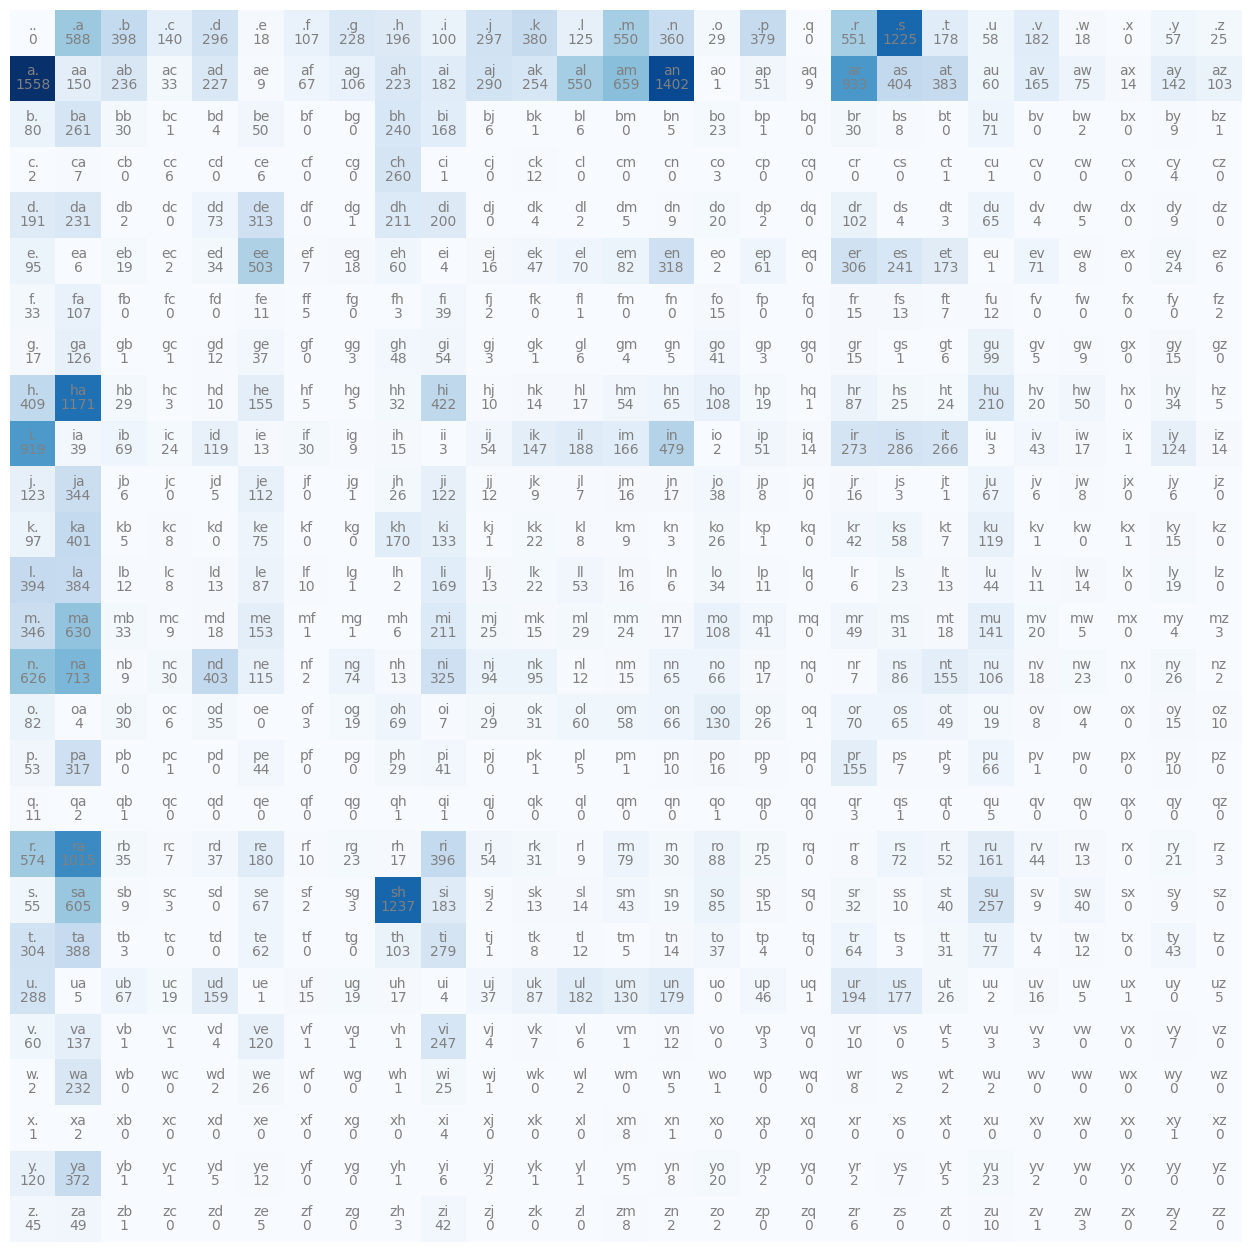

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [200]:

N[0]

tensor([   0,  588,  398,  140,  296,   18,  107,  228,  196,  100,  297,  380,
         125,  550,  360,   29,  379,    0,  551, 1225,  178,   58,  182,   18,
           0,   57,   25], dtype=torch.int32)

In [201]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.0907, 0.0614, 0.0216, 0.0456, 0.0028, 0.0165, 0.0352, 0.0302,
        0.0154, 0.0458, 0.0586, 0.0193, 0.0848, 0.0555, 0.0045, 0.0584, 0.0000,
        0.0850, 0.1889, 0.0274, 0.0089, 0.0281, 0.0028, 0.0000, 0.0088, 0.0039])

In [202]:
p.shape

torch.Size([27])

In [203]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [243]:
g = torch.Generator().manual_seed(214743647)

for i in range(50):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

nbal.
swshu.
jnjanjani.
ntetach.
sall.
man.
jakolr.
manittavel.
gatamar.
rajl.
akavil.
ajritu.
bakanjura.
pazinishrndanjunutanujahsh.
shatadhimjabhue.
asmjitah.
ju.
guhohnerbha.
ayan.
visharth.
jarurn.
bh.
sajh.
an.
d.
shanj.
vanwan.
vipra.
mama.
dyand.
s.
a.
jannil.
prpudasaliksrannafchbhuni.
majad.
anil.
sundanethadhwa.
shenth.
banjeraya.
shaki.
chandharbim.
icaranannonkhnind.
shoonsh.
shoga.
fagamjaribha.
b.
phji.
nima.
saba.
mchee.


In [205]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-112476.0938)
nll=tensor(112476.0938)
2.3584344387054443


In [206]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. a
a a
a b
b i
i d
d .


In [207]:
xs

tensor([0, 1, 1, 2, 9, 4])

In [208]:
ys

tensor([1, 1, 2, 9, 4, 0])

In [209]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [210]:
xenc.shape

torch.Size([6, 27])

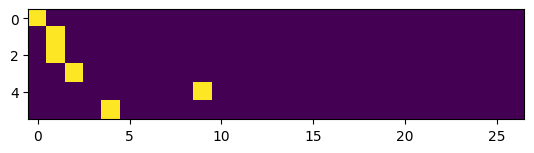

In [211]:
plt.imshow(xenc)

In [212]:
xenc.dtype

torch.float32

In [213]:
W = torch.randn((27, 27))
xenc @ W

tensor([[-0.6183, -0.0273, -1.2409,  0.1633, -1.1100,  0.4356,  0.1381,  1.2803,
         -0.9704,  0.4311,  2.2838,  2.5719,  0.9125, -0.8238, -0.3775,  1.2664,
          0.9355, -0.0301,  0.8003,  0.7224,  1.7905,  0.0450, -0.9409, -0.7763,
          0.9662,  0.6897,  0.9913],
        [ 2.5982,  0.1729,  1.5429, -0.2975,  1.0332, -0.0999,  2.2616, -1.1184,
          1.2269,  0.4921,  1.3498,  0.1273, -1.4993,  0.8476,  0.2876,  0.3561,
          2.0577, -0.5763, -0.4143,  0.8601,  0.9142,  0.7881, -0.9240, -1.1281,
          1.3073, -0.2051, -0.9647],
        [ 2.5982,  0.1729,  1.5429, -0.2975,  1.0332, -0.0999,  2.2616, -1.1184,
          1.2269,  0.4921,  1.3498,  0.1273, -1.4993,  0.8476,  0.2876,  0.3561,
          2.0577, -0.5763, -0.4143,  0.8601,  0.9142,  0.7881, -0.9240, -1.1281,
          1.3073, -0.2051, -0.9647],
        [-0.9123, -0.7384,  0.7001,  0.8989, -0.9342, -1.1289, -0.0303,  0.9922,
          0.9497,  0.4957, -1.5150, -0.0118,  0.6250, -0.6087,  0.5084,  0.5328

In [214]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0083, 0.0151, 0.0045, 0.0182, 0.0051, 0.0239, 0.0178, 0.0557, 0.0059,
         0.0238, 0.1519, 0.2027, 0.0386, 0.0068, 0.0106, 0.0549, 0.0395, 0.0150,
         0.0345, 0.0319, 0.0928, 0.0162, 0.0060, 0.0071, 0.0407, 0.0309, 0.0417],
        [0.1899, 0.0168, 0.0661, 0.0105, 0.0397, 0.0128, 0.1356, 0.0046, 0.0482,
         0.0231, 0.0545, 0.0160, 0.0032, 0.0330, 0.0188, 0.0202, 0.1106, 0.0079,
         0.0093, 0.0334, 0.0353, 0.0311, 0.0056, 0.0046, 0.0522, 0.0115, 0.0054],
        [0.1899, 0.0168, 0.0661, 0.0105, 0.0397, 0.0128, 0.1356, 0.0046, 0.0482,
         0.0231, 0.0545, 0.0160, 0.0032, 0.0330, 0.0188, 0.0202, 0.1106, 0.0079,
         0.0093, 0.0334, 0.0353, 0.0311, 0.0056, 0.0046, 0.0522, 0.0115, 0.0054],
        [0.0111, 0.0132, 0.0554, 0.0676, 0.0108, 0.0089, 0.0267, 0.0742, 0.0711,
         0.0452, 0.0060, 0.0272, 0.0514, 0.0150, 0.0458, 0.0469, 0.0222, 0.0154,
         0.1095, 0.0164, 0.0266, 0.0637, 0.0218, 0.0270, 0.0156, 0.0326, 0.0728],
        [0.0103, 0.0131,

In [215]:

probs[0]

tensor([0.0083, 0.0151, 0.0045, 0.0182, 0.0051, 0.0239, 0.0178, 0.0557, 0.0059,
        0.0238, 0.1519, 0.2027, 0.0386, 0.0068, 0.0106, 0.0549, 0.0395, 0.0150,
        0.0345, 0.0319, 0.0928, 0.0162, 0.0060, 0.0071, 0.0407, 0.0309, 0.0417])

In [216]:
probs[0].sum()

tensor(1.)

Name Generation Using Neural Network

In [217]:
xs

tensor([0, 1, 1, 2, 9, 4])

In [218]:
ys

tensor([1, 1, 2, 9, 4, 0])

In [219]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [220]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(6), ys].log().mean()

In [221]:
print(loss.item())

4.241153717041016


In [222]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [223]:
W.data += -0.1 * W.grad

In [248]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  47691


In [252]:

# gradient descent
for k in range(200):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -1 * W.grad

2.4163544178009033
2.416329860687256
2.4163050651550293
2.416280508041382
2.4162559509277344
2.416231155395508
2.4162063598632812
2.416182041168213
2.4161574840545654
2.416132926940918
2.4161083698272705
2.416084051132202
2.4160594940185547
2.4160349369049072
2.4160103797912598
2.4159860610961914
2.415961980819702
2.415937662124634
2.4159133434295654
2.415889024734497
2.415864944458008
2.4158406257629395
2.41581654548645
2.415792226791382
2.4157681465148926
2.415743827819824
2.415719985961914
2.415696144104004
2.4156723022460938
2.4156482219696045
2.4156241416931152
2.415600299835205
2.415576219558716
2.4155523777008057
2.4155285358428955
2.4155049324035645
2.415480852127075
2.415457248687744
2.415433406829834
2.415409803390503
2.4153859615325928
2.4153623580932617
2.4153387546539307
2.4153151512145996
2.4152915477752686
2.4152679443359375
2.4152445793151855
2.4152212142944336
2.4151976108551025
2.4151744842529297
2.4151511192321777
2.415127754211426
2.415104389190674
2.415081262588501

In [253]:
loss.item()

2.4119386672973633

In [254]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junidedil.
akar.
p.
sfay.
a.
na.
kui.
ritohirasatha.
sulanaauranileviaj.
dbininrwam.
r.
shaninay.
arta.
farmumesafodtumj.
prinsumahajani.
cora.
yar.
panar.
sabi.
n.
